# **Servo Prediction Using Regression**

-------------

## **Objective**

Title: Servo Motor Mechanism Dataset
Description:
This dataset provides information about a servo motor mechanism, capturing various parameters and their corresponding classes. Each entry in the dataset represents a specific configuration of the servo motor mechanism along with associated attributes.

Attributes:
Motor: Represents the type of motor used in the mechanism, categorized as 'A', 'B', 'C', 'D', or 'E'.
Screw: Indicates the type of screw used in the mechanism, classified as 'A', 'B', 'C', 'D', or 'E'.
Pgain: Refers to the proportional gain setting for the servo motor.
Vgain: Represents the velocity gain setting for the servo motor.
Class: Denotes the class label assigned to each configuration, which is a measure related to the performance or behavior of the servo mechanism.
Dataset Information:
The dataset contains a total of 5 entries, each representing a unique configuration of the servo motor mechanism. This dataset can be used for tasks such as classification or regression to predict the class label or performance metric based on the given attributes.

Potential Uses:
Servo Mechanism Performance Prediction: Build machine learning models to predict the performance class of a servo mechanism based on its attributes.
Feature Engineering and Selection: Explore the relationships between different attributes (e.g., Motor type, Screw type, Pgain, Vgain) and their impact on servo mechanism performance.
Educational Purposes: Use this dataset for educational activities such as data analysis, visualization, and modeling within the context of servo motor mechanisms.

## **Data Source**

This dataset was originally sourced from a study or experiment involving servo motor mechanisms and has been made available for analysis and exploration. The dataset is suitable for use in machine learning projects, educational settings, and research related to servo motor systems and control mechanisms.

## **Import Library**

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## **Import Data**

In [83]:
df=pd.read_csv("Servo Mechanism.csv")
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


## **Describe Data**

In [84]:
df.describe(include='all')

,Motor,Screw,Pgain,Vgain,Class
count,167,167,167.000000,167.000000,167.000000
unique,5,5,NaN,NaN,NaN
top,C,A,NaN,NaN,NaN
freq,40,42,NaN,NaN,NaN
mean,NaN,NaN,4.155689,2.538922,21.173653
std,NaN,NaN,1.017770,1.369850,13.908038
min,NaN,NaN,3.000000,1.000000,1.000000
25%,NaN,NaN,3.000000,1.000000,10.500000
50%,NaN,NaN,4.000000,2.000000,18.000000
75%,NaN,NaN,5.000000,4.000000,33.500000


In [85]:
df.shape

(167, 5)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.7+ KB


## **Data Visualization**

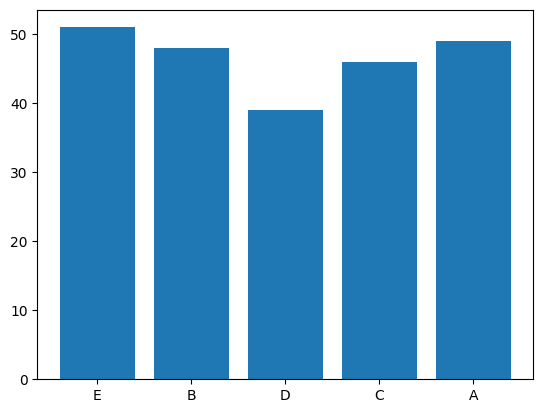

In [87]:
x=df['Motor']
y=df['Class']
plt.bar(x,y, data=df)
plt.show()

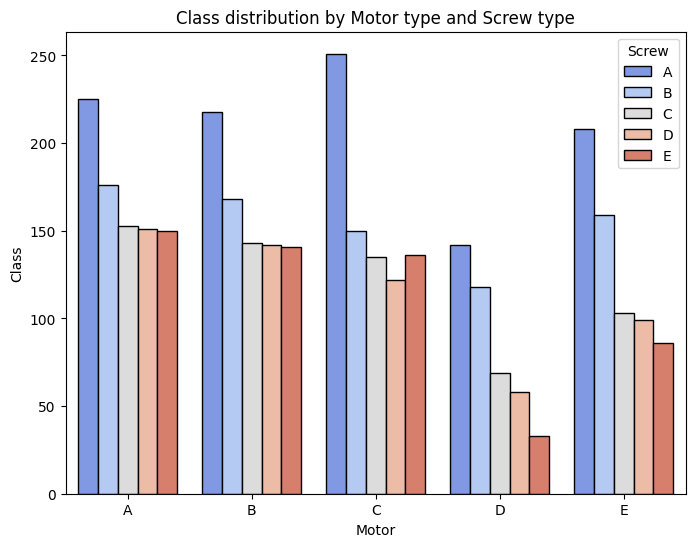

In [88]:
plt.figure(figsize=(8,6))

motor_screw_counts =df.groupby(['Motor','Screw'])['Class'].sum().reset_index()
sns.barplot(x='Motor',y='Class',hue='Screw',
           data=motor_screw_counts,
           palette='coolwarm',edgecolor='black')
plt.title("Class distribution by Motor type and Screw type")
plt.show()

Insights:
1) Screw type (Screw) selection significantly influences Class values for each motor type (Motor).

2) Motor C with Screw A (C-A) exhibits the highest Class value (251), suggesting an optimal combination.

3) Comparisons across motor-screw combinations reveal performance variations and potential areas for improvement.

## **Data Preprocessing**

In [89]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_7376\2530754757.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_7376\2530754757.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)


## **Define Target Variable (y) and Feature Variables (X)**

In [90]:
X=df.drop('Class',axis=1)
y=df['Class']

## **Train Test Split**

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2529)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

## **Modeling**

In [92]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [93]:
y_pred=model.predict(X_test)
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

## **Model Evaluation**

In [94]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [95]:
mean_squared_error(y_test,y_pred)

66.03589175595566

In [96]:
mean_absolute_error(y_test,y_pred)

7.190539677251238

In [97]:
r2_score(y_test,y_pred)

0.6807245170563927

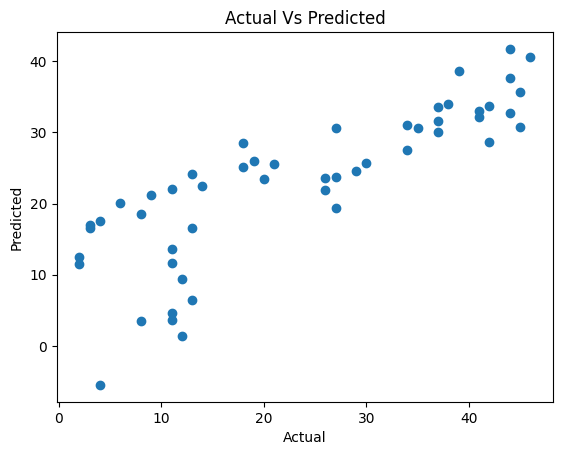

In [98]:
A=y_test
B=y_pred
plt.scatter(A,B)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs Predicted')
plt.show()

## **Prediction**

Lets gets a sample of a row using sample function

Steps to ollow:
1) Select a random row
2) Seperate X and y
3) Standardize X
4) Predict**

In [99]:
X_new=df.sample(1)
X_new

,Motor,Screw,Pgain,Vgain,Class
113,1,0,4,3,28


In [104]:
X_new=X_new.drop('Class',axis=1)
X_new

,Motor,Screw,Pgain,Vgain
113,1,0,4,3


In [106]:
y_pred_new=model.predict(X_new)
y_pred_new

array([32.63928506])